# Datasets by Year

This notebook generated Figure 6a from the paper: a bar plot that shows the number of datasets uploaded by year.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path
root = Path().cwd()
if root.name == "scripts":
    root = root.parent

In [3]:
users = pd.read_csv(root / "data/datasets.tsv", sep="\t")

In [4]:
users["upload_date"] = pd.to_datetime(users["upload_date"])

Last Login does not seem very reliable, e.g., Jan, Joaquin, and Pieter all have a login years ago.
I (Pieter) know for a fact I logged in to OpenML more than once a year.

In [5]:
users["year"] = users["upload_date"].dt.year

In [6]:
users = users[users["year"]<2025]

In [7]:
count_by_year = users.groupby(["year"]).count()
count_by_year["cumulative"] = count_by_year["upload_date"].cumsum()
count_by_year.reset_index(inplace=True)

Text(0, 0.5, 'Number of Datasets')

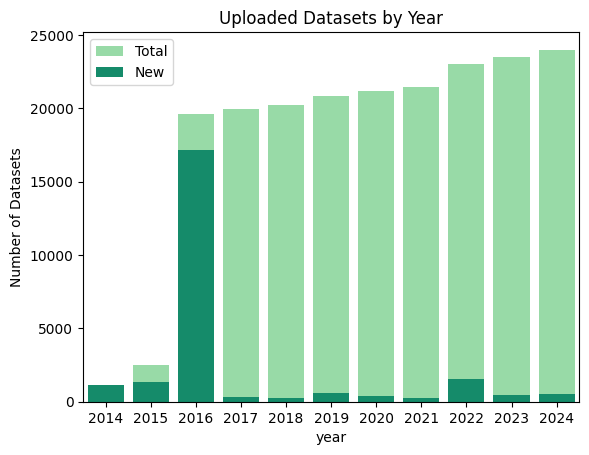

In [8]:
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="year", y="cumulative", data=count_by_year,
            label="Total", color="g")

# Plot the crashes where alcohol was involved
sns.set_color_codes("colorblind")
plot = sns.barplot(x="year", y="upload_date", data=count_by_year,
            label="New", color="g")

plot.set_title("Uploaded Datasets by Year")
plot.set_ylabel("Number of Datasets")

The QSAR datasets (spike of 17k datasets in 2016) make this hard to read.

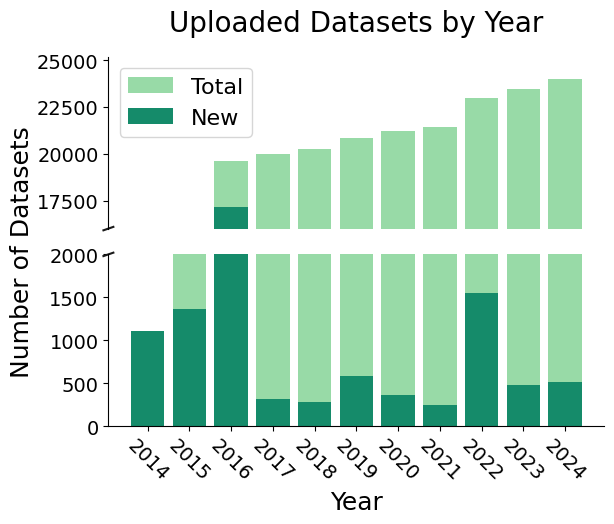

In [9]:
f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace':0.15})

sns.set_color_codes("pastel")
sns.barplot(x="year", y="cumulative", data=count_by_year,
            label="Total", color="g", ax=ax_top)

# Plot the crashes where alcohol was involved
sns.set_color_codes("colorblind")
sns.barplot(x="year", y="upload_date", data=count_by_year,
            label="New", color="g", ax=ax_top)

sns.set_color_codes("pastel")
sns.barplot(x="year", y="cumulative", data=count_by_year,
            label="Total", color="g", ax=ax_bottom)

# Plot the crashes where alcohol was involved
sns.set_color_codes("colorblind")
sns.barplot(x="year", y="upload_date", data=count_by_year,
            label="New", color="g", ax=ax_bottom)

ax_top.set_ylabel("")
ax_top.set_title("Uploaded Datasets by Year", fontsize=20, y=1.1)

ax_bottom.set_ylabel("Number of Datasets", fontsize=18)
ax_bottom.set_xlabel("Year", fontsize=18)
ax_bottom.yaxis.set_label_coords(-0.15,1.02)
ax_bottom.tick_params(axis='both', which='major', labelsize=14)
ax_bottom.tick_params(axis='x', which='major', labelsize=14, labelrotation=-45)
ax_top.tick_params(axis='both', which='major', labelsize=14)
ax_top.legend(fontsize=16)

ax_top.set_ylim(bottom=16000)
ax_bottom.set_ylim(0,2000)

sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)
ax_top.tick_params(bottom=False)


ax = ax_top
d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

ax2 = ax_bottom
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal

#remove one of the legend
ax_bottom.legend_.remove()
plt.show()

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages(root / "figures/datasets_by_year.pdf") as fh:
    fh.savefig(f, bbox_inches="tight")